# Múltiples muestras para una red cuadrada

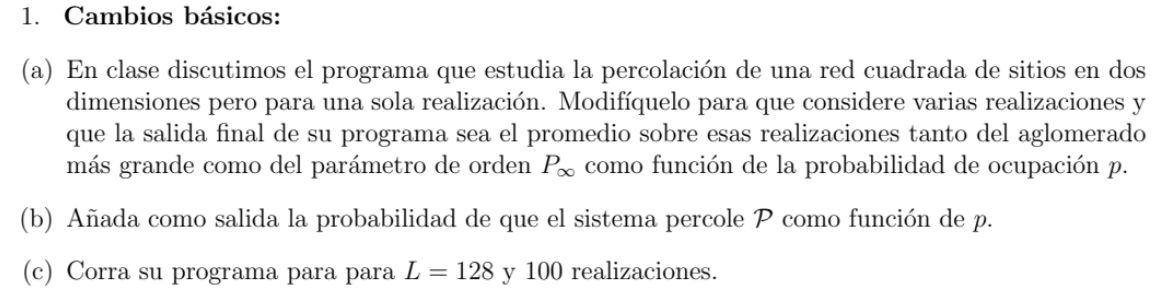

In [69]:
import numpy as np
import matplotlib.pyplot as plt

In [70]:
def permutation():
    global order,N
    order = np.random.permutation(N)

# Setting the boundaries no PBC utilizando case, no hay vecino EMPTY
def vecino(s,j):
    global L,empty
    
   
    elif j==0: #derecha
        if s%L == L-1:
            return empty
        else:
            return s+1
        
        elif j==1: #arriba
        if s//L == L-1:
            return empty
        else:
            return s+L
        
         if j == 2: #izquierda
        if s%L ==0:
            return empty
        else:
            return s-1
        
        
    elif j==3: #abajo
        if s//L == 0:
            return empty
        else:
            return s-L
    
                
def boundaries(): #Se coloca fuera del for 
    global N,nn
    for s in range(N):
        for j in range(4):
            nn[s,j] = vecino(s,j)

# Find operation de la raiz, versión no recursiva, no se cambian los ptr.
def findroot(r):
    global parent
    while parent[r] >= 0:
        r = parent[r]
    return r

In [71]:
#union de raíces (clusters), version no recursiva
def mergeroots(r1,r2):
    global spanclussize,parent,touchesLeft,touchesRight
    if r1 == r2:
        return r1
    elif -parent[r1] > -parent[r2]:
        parent[r1] += parent[r2]
        parent[r2] = r1
        #si alguno de los dos toca a la izquierda el compuesto tocará
        touchesLeft[r1] = touchesLeft[r1] or touchesLeft[r2] 
        #si alguno de los dos toca a la derecha  el compuesto tocará
        touchesRight[r1] = touchesRight[r1] or touchesRight[r2]
        if touchesLeft[r1] and touchesRight[r1]:
            #si el cluster toca a la izquierda y a la derecha existirá aglomerado expnadido
            spanclussize = -parent[r1]
        return r1 
    else:
        parent[r2] += parent[r1]
        parent[r1] = r2
        #si alguno de los dos toca a la izquierda el compuesto tocará
        touchesLeft[r2] = touchesLeft[r2] or touchesLeft[r1]
        #si alguno de los dos toca a la derecha  el compuesto tocará
        touchesRight[r2] = touchesRight[r2] or touchesRight[r1]
        if touchesLeft[r2] and touchesRight[r2]:
            #si el cluster toca a la izquierda y a la derecha existirá aglomerado expnadido
            spanclussize = -parent[r2]
        return r2        

In [72]:
def percolate():
    global spanclussize,order,parent,nn
    BIG = []
    PSpan = []
    big=0
    spanclussize = 0
    
    for i in range(N): parent[i]=empty 
    for i in range(N):
        r1=s1=order[i]
        parent[s1] = -1
        for j in range(6):
            s2=nn[s1, j]
            if s2 != empty:
                if parent[s2] != empty:
                    r1 = mergeroots(r1,findroot(s2))
                    if -parent[r1]>big: big=-parent[r1]
        BIG.append(big)
        PSpan.append(spanclussize/(i+1.))

    return np.array(BIG), np.array(PSpan)

In [73]:
#Datos, inicalizaciones  y corridas
global L, N, empty, parent, nn, order, spanclussize,touchesLeft,touchesRight

L = 6
N = L**2
# Bigprom = np.zeros(N)
order=np.zeros(N, dtype=int) 
empty=-(N+1)
nn=np.zeros((N, 6), dtype=int)              # nearest neighbors
permutation()
boundaries()
muestras = 100
BIG_I = []
PSpan_I = []
#Bigprom += BIG
#Bigprom /= muestras

######FOR PARA VARIAS CORRIDAS
for i in range(0,muestras):
    parent=np.zeros(N, dtype=int)               # array of pointers #Inicializa dentro del For
    touchesLeft =  [i%L == 0 for i in range(N)] # Inicializa dentro del For
    touchesRight = [i%L == L-1 for i in range(N)] # Inicializa dentro del For
    BIG, PSpan = percolate()
    BIG_I.append(BIG)
    PSpan_I.append(PSpan)
    Prob = np.copy(PSpan) #mejorarlo
    Prob[PSpan > 0] = 1

In [67]:
p = np.array(range(1,N+1))/N
plt.figure(figsize=(8,6))
BIG_I = BIG_I/N  #Normalizado
plt.plot(p, BIG_I, 'b-',label = "L = {}".format(L))
plt.xlabel(r"$p$",fontsize = 18)
plt.ylabel("Largest cluster size",fontsize = 18)
plt.title(r"$N = $ {} $\times$ {}".format(L,L))
plt.axvline(0.59275, color = "gray",zorder=-1)
plt.text(0.6,0.9*BIG.max(),r'$p_c = 0.59275$')
plt.legend(loc = 'best')

TypeError: unsupported operand type(s) for /: 'list' and 'int'

<Figure size 576x432 with 0 Axes>

# Varios tamaños del sistema

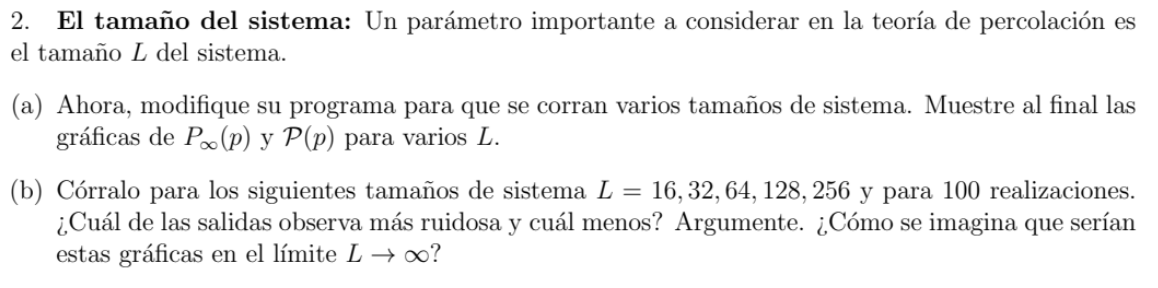

# Red triangular

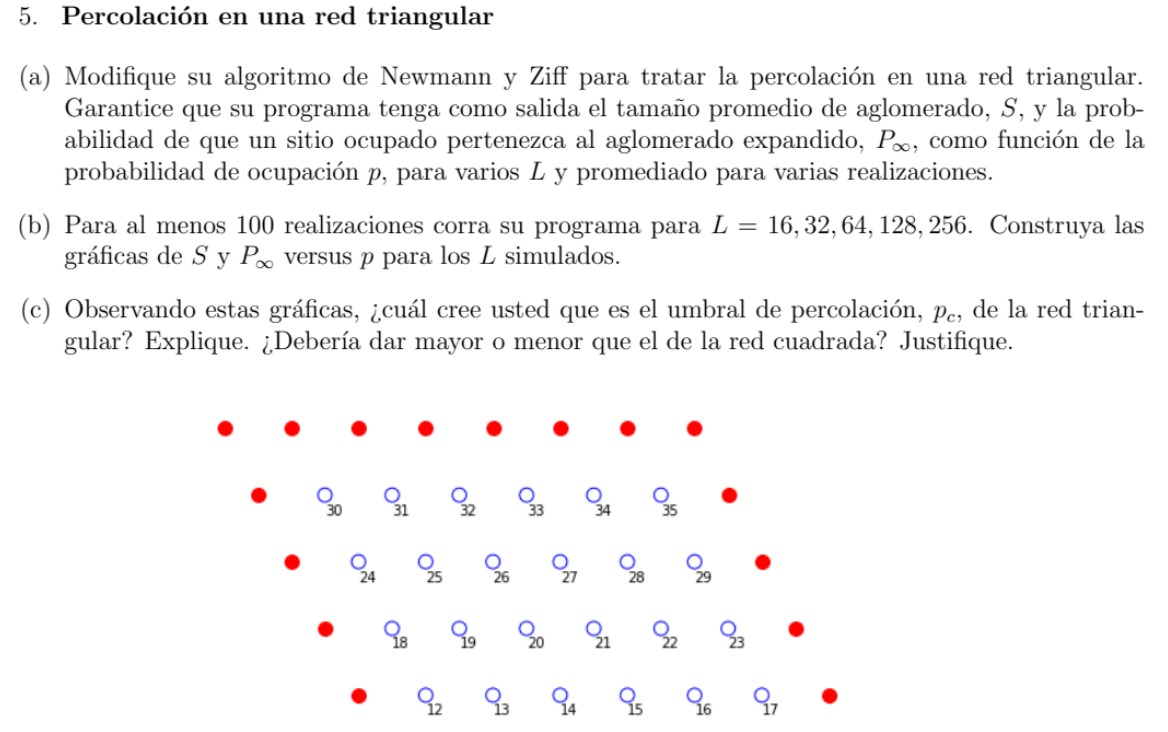

In [16]:
import numpy as np
import matplotlib.pyplot as plt

In [42]:
#RED TRIANGULAR
#Setting the boundaries no PBC utilizando case, no hay vecino EMPTY
def permutation():
    global order,N
    order = np.random.permutation(N)

def vecino(s,j):
    global L,empty
    
    if j == 0: #derecha
        if s%L == L-1:
            return empty
        else:
            return s+1
    elif j==1: #arriba derecha
        if s//L == L-1:
            return empty
        else:
            return s+L+1
    elif j==2: #arriba izquierda
        if s//L == L-2:
            return empty
        else:
            return s+L
    elif j ==3: #izquierda
        if s%L == 0:
            return empty
        else:
            return s-1
    elif j==4: #abajo derecha
        if s//L == 0:
            return empty
        else:
            return s-L
    elif j==5: #abajo izquierda
        if s//L == 0:
            return empty
        else:
            return s-L-1
                
def boundaries(): #Se coloca fuera del for 
    global N,nn
    for s in range(N):
        for j in range(6):
            nn[s,j] = vecino(s,j)
            
# Find operation de la raiz, versión no recursiva, no se cambian los ptr.
def findroot(r):
    global parent
    while parent[r] >= 0:
        r = parent[r]
    return r

In [52]:
#union de raíces (clusters), version no recursiva
def mergeroots(r1,r2):
    global spanclussize,parent,touchesLeft,touchesRight
    if r1 == r2:
        return r1
    elif -parent[r1] > -parent[r2]:
        parent[r1] += parent[r2]
        parent[r2] = r1
        #si alguno de los dos toca a la izquierda el compuesto tocará
        touchesLeft[r1] = touchesLeft[r1] or touchesLeft[r2] 
        #si alguno de los dos toca a la derecha  el compuesto tocará
        touchesRight[r1] = touchesRight[r1] or touchesRight[r2]
        if touchesLeft[r1] and touchesRight[r1]:
            #si el cluster toca a la izquierda y a la derecha existirá aglomerado expnadido
            spanclussize = -parent[r1]
        return r1 
    else:
        parent[r2] += parent[r1]
        parent[r1] = r2
        #si alguno de los dos toca a la izquierda el compuesto tocará
        touchesLeft[r2] = touchesLeft[r2] or touchesLeft[r1]
        #si alguno de los dos toca a la derecha  el compuesto tocará
        touchesRight[r2] = touchesRight[r2] or touchesRight[r1]
        if touchesLeft[r2] and touchesRight[r2]:
            #si el cluster toca a la izquierda y a la derecha existirá aglomerado expnadido
            spanclussize = -parent[r2]
        return r2        

In [55]:
def percolate():
    global spanclussize,order,parent,nn
    BIG = []
    PSpan = []
    big=0
    spanclussize = 0
    
    for i in range(N): parent[i]=empty 
    for i in range(N):
        r1=s1=order[i]
        parent[s1] = -1
        for j in range(6):
            s2=nn[s1, j]
            if s2 != empty:
                if parent[s2] != empty:
                    r1 = mergeroots(r1,findroot(s2))
                    if -parent[r1]>big: big=-parent[r1]
        BIG.append(big)
        PSpan.append(spanclussize/(i+1.))

    return np.array(BIG), np.array(PSpan)

In [56]:
#Datos, inicalizaciones  y corridas
global L, N, empty, parent, nn, order, spanclussize,touchesLeft,touchesRight

L = 6
N = L**2
# Bigprom = np.zeros(N)
order=np.zeros(N, dtype=int) 
empty=-(N+1)
nn=np.zeros((N, 6), dtype=int)              # nearest neighbors
permutation()
boundaries()

#Bigprom += BIG
#Bigprom /= muestras

parent=np.zeros(N, dtype=int)               # array of pointers #Inicializa dentro del For
touchesLeft =  [i%L == 0 for i in range(N)] # Inicializa dentro del For
touchesRight = [i%L == L-1 for i in range(N)] # Inicializa dentro del For
BIG, PSpan = percolate()
Prob = np.copy(PSpan) #mejorarlo
Prob[PSpan > 0] = 1

IndexError: index 37 is out of bounds for axis 0 with size 36